## Data Gathering



**1. The WeRateDogs Twitter archive:** Download this file manually and load the data with pandas. 

**2. The tweet image predictions:** The breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is hosted on the below servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

**3. Twitter API:** Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [2]:
#Import packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import tweepy 
import json

In [3]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

/Users/Lei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### 1. The WeRateDogs Twitter Archive:

In [4]:
# open the file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 2. Tweet Image Predictions

In [6]:
# Download the file programmatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [7]:
# Write the contents into the file 
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [8]:
# Open and preview the file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API and JSON


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'ZhBS8fnA0BeidSgHQJioukMsO'
consumer_secret = 'WKJfodrY2wUHeQheKBIgE6N5m4rjIk5FO6ueaMq8alckXsKuUh'
access_token = '338800830-hjEJeFCiUMtESXEgNHcgc9qYnPZlTHJDWMIMEKkT'
access_secret = '3qJaG2GQ1v5SY32fC6fLk804bL4shJfoa0rjoe7dSZZjD'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

In [13]:
list_of_tweets = []
for line in open('tweet_json.txt', 'r'):
    list_of_tweets.append(json.loads(line))

In [14]:
# Obtain the information we are interested in 
tweet_ids = []
retweet_counts = []
favorite_counts = []
followers_counts = []

for tweet in list_of_tweets:
    tweet_ids.append(tweet['id_str'])
    retweet_counts.append(tweet['retweet_count'])
    favorite_counts.append(tweet['favorite_count'])
    followers_counts.append(tweet['user']['followers_count'])

In [15]:
# Convert it to a dataframe named tweet_api
tweet_api = pd.DataFrame({
    'tweet_id': tweet_ids,
    'retweet_count': retweet_counts,
    'favorite_count': favorite_counts,
    'followers_count': followers_counts
})

In [16]:
# Save it as csv file
tweet_api.to_csv

<bound method NDFrame.to_csv of                 tweet_id  retweet_count  favorite_count  followers_count
0     892420643555336193  8853           39467           3200889        
1     892177421306343426  6514           33819           3200889        
2     891815181378084864  4328           25461           3200889        
3     891689557279858688  8964           42908           3200889        
4     891327558926688256  9774           41048           3200889        
...                  ...   ...             ...               ...        
2349  666049248165822465  41             111             3201018        
2350  666044226329800704  147            311             3201018        
2351  666033412701032449  47             128             3201018        
2352  666029285002620928  48             132             3201018        
2353  666020888022790149  532            2535            3201018        

[2354 rows x 4 columns]>

In [17]:
# Preview and exam the file
tweet_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Assessing Data

Data was assessed manually and programmatically for both quality and tidiness issues in this session.

The quality of data is assessed against four criteria: completeness, validity, accuracy, and consistency.

Data tidiness is a structural issue. According to the regulations by Hadley Wikham, a tidy dataset is defined as 1. Each variable forms a column. 2. Each observation forms a row. 3. Each type of observational unit forms a table. (Link: https://vita.had.co.nz/papers/tidy-data.pdf)

### 1. Access the Twitter Archive:

Exam the twitter_archive dataset manually and programmatically.

#### twitter_archive general information

In [18]:
# Print 15 random records of twitter_archive
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2021,672082170312290304,NaN,NaN,2015-12-02 15:57:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Patch. He wants to be a Christmas tree. 11/10 https://t.co/WTJtf9O8Jg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672082170312290304/photo/1,11,10,Patch,None,None,None,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697422163968/photo/1,8,10,Chip,None,None,None,None
787,774639387460112384,NaN,NaN,2016-09-10 16:03:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sprinkles. He's trapped in light jail. 10/10 would post bail for him https://t.co/4s5Xlijogu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/774639387460112384/photo/1,https://twitter.com/dog_rates/status/774639387460112384/photo/1",10,10,Sprinkles,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Aspen. He's astronomically fluffy. I wouldn't stop petting this dog if the world was ending around me 11/10 https://t.co/oBlgL9nxpx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/681193455364796417/photo/1,https://twitter.com/dog_rates/status/681193455364796417/photo/1",11,10,Aspen,None,None,None,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl https://t.co/MYJvdlNRVa",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521741709313/photo/1,12,10,Earl,None,None,None,None
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you just can't resist... 10/10 topnotch tongue https://t.co/jeWEGUgbXf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746790600704425984/photo/1,https://twitter.com/dog_rates/status/746790600704425984/photo/1,https://twitter.com/dog_rates/status/746790600704425984/photo/1",10,10,None,None,None,None,None
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,doggo,None,None,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you realize it doesn't matter how hard you study. You're still going to fail. 10/10 https://t.co/qzYXbyv0SJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893172875264/photo/1,10,10,None,None,None,None,None
722,783085703974514689,NaN,NaN,2016-10-03 23:25:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Earl. He can't catch. Did his best tho. 11/10 would repair confidence with extra pats https://t.co/IsqyvbjFgM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/783085703974514689/photo/1,https://twitter.com/dog_rates/status/783085703974514689/photo/1",11,10,Earl,None,None,None,None
1980,672975131468300288,NaN,NaN,2015-12-05 03:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel="

In [19]:
# check the twitter_archive info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# check the statistics of the twitter_archive dataset
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
# check if there is any duplicated tweets in this dataset
sum(twitter_archive['tweet_id'].duplicated())

0

#### rating_numerator and rating_denominator

In [22]:
# check one of the key variables in the dataset - 'rating_numerator'
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [23]:
# check one of the key variables in the dataset - 'rating_denominator'
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [24]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


_Notes:_

- The **range** of both rating_numerator as well as the rating_denominator are huge.

- The **min** value of the rating_numerator and the rating_denominator are **0**. 

- **Max** value of rating_numerator is **1776** and **170** for rating_denominator.

- **Mode** of both columns are different. Rating_numerator mode is **12**. The mode of rating_denominator is **10**, which accounts for 2333 out of 2356 records. 

#### name

In [25]:
twitter_archive['name'].value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
           .. 
Ron        1  
Skittle    1  
his        1  
Nimbus     1  
Harnold    1  
Name: name, Length: 957, dtype: int64

#### expanded_urls

According to the infomation section, there are only 2297 expanded_urls.

In [26]:
# total missing expanded_urls
sum(twitter_archive['expanded_urls'].isnull())

59

In [27]:
# missing expanded_urls due to the reply or retweet
sum(twitter_archive['expanded_urls'].isnull() &  (twitter_archive['in_reply_to_status_id'].notnull() | twitter_archive['retweeted_status_id'].notnull()))

56

In [28]:
#display the 3 missing expanded_urls and their tweet_id, text
missing_url = twitter_archive['expanded_urls'].isnull() &  (twitter_archive['in_reply_to_status_id'].isnull() & twitter_archive['retweeted_status_id'].isnull())
twitter_archive[missing_url][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [29]:
# check if these three missing urls are in the other two dataset.

tweet_id_set_url = {828361771580813312, 785515384317313025, 696518437233913856}

# can't find the tweets in both dataset
print(sum(image_predictions['tweet_id'].isin(tweet_id_set_url)))
print(sum(tweet_api['tweet_id'].isin(tweet_id_set_url)))

0
0


_Notes:_
The missing expanded_urls are 59 in total. 56 of it are due to its retweet or reply status, and 3 are not recorded in all of the 3 data sets.

#### source

In [30]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

_Notes:_

Total 4 sources included.

**Twitter_archive Observations:**

This info section reveals some issues of the twitter_archive dataset.

- Total 2356 tweets

- The timestamp column is not in date format. 

- 2297 tweets with non-null expanded_urls links to images. A small portion of data might be missing. 

- 181 retweets with 3 related columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

- 78 replies with 2 columns: in_reply_to_status_id, in_reply_to_user_id

- Name column has 745 'None' and 55 'a'. 

- Small portion of the rating_denominator are not 10.

- Total 4 sources, should be further cleaned. 

Tideness:

- Column headers are values, not variable names. In this dataset, there are total 4 columns for dog stages: doggo, floofer, pupper, puppo. 

### 2. Tweet Image predictions:

Exam the image_predictions dataset manually and programmatically.

In [31]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1047,713177543487135744,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,whippet,0.734244,True,basenji,0.025948,True,Great_Dane,0.025874,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True


In [32]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
sum(image_predictions['tweet_id'].duplicated())

0

In [41]:
sum(image_predictions['jpg_url'].duplicated())

66

In [49]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [50]:
image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [51]:
image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [33]:
# sum of records where all types are predicted as False
sum(~image_predictions['p1_dog'] & ~image_predictions['p2_dog'] & ~image_predictions['p3_dog'])

324

**Image predictions Observations**

- Image_predictions is relatively well strcutured compared with the twitter archieve file. 

- There are a total of 324 entries where the algorithm fails to predict any valid dog breed. When we exam the three categories individually, each column has over 500 entries where the algorithm did not anticipate the breed from the image. 

### 3. Twitter API & JSON

In [34]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [35]:
tweet_api.sample(10)

,tweet_id,retweet_count,favorite_count,followers_count
777,775898661951791106,17621,0,3200902
1138,727685679342333952,720,3206,3200945
5,891087950875897856,3261,20562,3200889
2054,671357843010908160,157,426,3201007
1361,702932127499816960,811,2825,3200858
437,820013781606658049,1369,0,3200894
388,826476773533745153,4821,20275,3200892
1078,738891149612572673,6,115,3200943
1242,711743778164514816,1101,3095,3200947
2277,667405339315146752,234,489,3201016


In [36]:
tweet_api.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


### Data Assessment Summary

**Quality**

_twitter_archive_

- The timestamp column is not in date format. 

- There are 2297 tweets with non-null expanded_urls links to images, meaning 59 records are missing. In this 59 missing expanded_urls, 56 out of it are results from retweets or replies. The remaining 3 missing records are neither in image_predictions nor the tweet_api dataset. However, it might not affect the final analysis thus we will keep those 3 records as the way it is. [will not be cleaned]

- There are 181 retweets with 3 related columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

- There are 78 replies with 2 columns: in_reply_to_status_id, in_reply_to_user_id

- There are some non_valid values in the Name column. 745 'None' and 55 'a'. It might not worthy cross-checking the valid name, as it is not relevant for the following analysis. As such, we will leave it the way it is. [will not be cleaned]

- In all 2356 entries, there are 2333 rating_denominator marked as 10. We will exam the individual case and fix it accordingly. 

- There are rating_numerator records that exhibit unusual value; some do not make sense. We need to clean this column accordingly. 

- Total 4 sources - further simplify and remove the outer tag. 


_Image predictions Observations_

- 281 missing records compared with tweets archive. Classified as missing data.

_Tweet_api Observations_

- 2 missing records compared with tweets archive.

**Tideness**

_twitter_archive_

- Column headers are values, not variable names. In this dataset, there are a total of 4 columns for dog stages: doggo, floofer, pupper, puppo.

- Drop the Retweet and Reply related columns, as we do not need them for the following analysis. 


_Tweet_api Observations_

- Combine with twitter archive data set.

## Clean Data

In this section, we will tackle the issues addressed in the Data Assessment Summary. 

In [105]:
# create copies
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_clean = tweet_api.copy()

### Quality

#### 1. The timestamp column is not in date format. 

**Define**

Convert timestamp column in twitter_archive_clean to date data type using pandas to_datetime.

**Code**

In [106]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**Test**

In [107]:
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

#### 2. There are 181 retweets with 3 related columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

**Define**

- Drop rows where retweeted_status_id is not null. 
- Use pandas.drop, dropping the 3 columns, as we only interested in the original tweets. 

**Code**

In [108]:
# double check the total number of rows we are about to drop
sum(twitter_archive_clean['retweeted_status_id'].notnull())

181

In [109]:
# drop the rows where 'retweeted_status_id' is not null
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [110]:
# drop columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

**Test**

In [111]:
# make sure the 181 rows has been dropped
twitter_archive_clean.shape

(2175, 14)

In [112]:
# make sure the columns has been dropped 
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 3. There are 78 replies with 2 columns: in_reply_to_status_id, in_reply_to_user_id

**Define**

- Drop rows where in_reply_to_status_id is not null.
- Use pandas.drop, dropping the 2 columns, as we only interested in the original tweets.

**Code**

In [113]:
# double check the total number of rows we are about to drop
sum(twitter_archive_clean['in_reply_to_status_id'].notnull())

78

In [114]:
# drop the rows where 'in_reply_to_status_id' is not null
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

In [115]:
# drop columns: in_reply_to_status_id, in_reply_to_user_id

twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

**Test**

In [116]:
# make sure the 78 rows has been dropped
twitter_archive_clean.shape

(2097, 12)

In [117]:
# make sure the columns has been dropped 
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 4. In all 2356 entries, there are 2333 rating_denominator marked as 10. We will exam the individual case and fix it accordingly.

In [118]:
# display the rows where rating_denominator is not equal to 10
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None


**Define**

After checking the full text of rach row, following changes should be made accordingly. 
The errorous denominator value is often made by extracting wrong information. 

tweet_id:

666287406224695296 change to 9/10

675853064436391936 change to 11/10

677716515794329600 change to 12/10

682962037429899265 change to 10/10

684222868335505415 change to 11/10

713900603437621249 change to 11/10

697463031882764288 change to 11/10

704054845121142784 change to 12/10

709198395643068416 change to 9/10

710658690886586372 change to 10/10

713900603437621249 change to 11/10

716439118184652801 change to 11/10

722974582966214656 change to 13/10

731156023742988288 change to 12/10

740373189193256964 change to 14/10

758467244762497024 change to 11/10

820690176645140481 change to 14/10

**Code & Test**

Manually fix each row and confirm the update.

In [119]:
row = twitter_archive_clean.tweet_id == 666287406224695296
twitter_archive_clean.loc[row, 'rating_numerator'] = 9
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

In [120]:
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 666287406224695296].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 666287406224695296].rating_denominator)

2335    9
Name: rating_numerator, dtype: int64
2335    10
Name: rating_denominator, dtype: int64


In [121]:
row = twitter_archive_clean.tweet_id == 675853064436391936
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 675853064436391936].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 675853064436391936].rating_denominator)

1843    11
Name: rating_numerator, dtype: int64
1843    10
Name: rating_denominator, dtype: int64


In [122]:
row = twitter_archive_clean.tweet_id == 677716515794329600
twitter_archive_clean.loc[row, 'rating_numerator'] = 12
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 677716515794329600].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 677716515794329600].rating_denominator)

1779    12
Name: rating_numerator, dtype: int64
1779    10
Name: rating_denominator, dtype: int64


In [123]:
row = twitter_archive_clean.tweet_id == 682962037429899265
twitter_archive_clean.loc[row, 'rating_numerator'] = 10
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 682962037429899265].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 682962037429899265].rating_denominator)

1662    10
Name: rating_numerator, dtype: int64
1662    10
Name: rating_denominator, dtype: int64


In [124]:
row = twitter_archive_clean.tweet_id == 684222868335505415
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 684222868335505415].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 684222868335505415].rating_denominator)

1635    11
Name: rating_numerator, dtype: int64
1635    10
Name: rating_denominator, dtype: int64


In [125]:
row = twitter_archive_clean.tweet_id == 713900603437621249
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 713900603437621249].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 713900603437621249].rating_denominator)

1228    11
Name: rating_numerator, dtype: int64
1228    10
Name: rating_denominator, dtype: int64


In [126]:
row = twitter_archive_clean.tweet_id == 697463031882764288
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 697463031882764288].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 697463031882764288].rating_denominator)

1433    11
Name: rating_numerator, dtype: int64
1433    10
Name: rating_denominator, dtype: int64


In [127]:
row = twitter_archive_clean.tweet_id == 704054845121142784
twitter_archive_clean.loc[row, 'rating_numerator'] = 12
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 704054845121142784].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 704054845121142784].rating_denominator)

1351    12
Name: rating_numerator, dtype: int64
1351    10
Name: rating_denominator, dtype: int64


In [128]:
row = twitter_archive_clean.tweet_id == 709198395643068416
twitter_archive_clean.loc[row, 'rating_numerator'] = 9
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 709198395643068416].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 709198395643068416].rating_denominator)

1274    9
Name: rating_numerator, dtype: int64
1274    10
Name: rating_denominator, dtype: int64


In [129]:
row = twitter_archive_clean.tweet_id == 710658690886586372
twitter_archive_clean.loc[row, 'rating_numerator'] = 10
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 710658690886586372].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 710658690886586372].rating_denominator)

1254    10
Name: rating_numerator, dtype: int64
1254    10
Name: rating_denominator, dtype: int64


In [130]:
row = twitter_archive_clean.tweet_id == 713900603437621249
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 713900603437621249].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 713900603437621249].rating_denominator)

1228    11
Name: rating_numerator, dtype: int64
1228    10
Name: rating_denominator, dtype: int64


In [131]:
row = twitter_archive_clean.tweet_id == 716439118184652801
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 716439118184652801].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 716439118184652801].rating_denominator)

1202    11
Name: rating_numerator, dtype: int64
1202    10
Name: rating_denominator, dtype: int64


In [132]:
row = twitter_archive_clean.tweet_id == 722974582966214656
twitter_archive_clean.loc[row, 'rating_numerator'] = 13
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 722974582966214656].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 722974582966214656].rating_denominator)

1165    13
Name: rating_numerator, dtype: int64
1165    10
Name: rating_denominator, dtype: int64


In [133]:
row = twitter_archive_clean.tweet_id == 731156023742988288
twitter_archive_clean.loc[row, 'rating_numerator'] = 12
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 731156023742988288].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 731156023742988288].rating_denominator)

1120    12
Name: rating_numerator, dtype: int64
1120    10
Name: rating_denominator, dtype: int64


In [134]:
row = twitter_archive_clean.tweet_id == 740373189193256964
twitter_archive_clean.loc[row, 'rating_numerator'] = 14
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 740373189193256964].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 740373189193256964].rating_denominator)

1068    14
Name: rating_numerator, dtype: int64
1068    10
Name: rating_denominator, dtype: int64


In [135]:
row = twitter_archive_clean.tweet_id == 758467244762497024
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 758467244762497024].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 758467244762497024].rating_denominator)

902    11
Name: rating_numerator, dtype: int64
902    10
Name: rating_denominator, dtype: int64


In [136]:
row = twitter_archive_clean.tweet_id == 820690176645140481
twitter_archive_clean.loc[row, 'rating_numerator'] = 14
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 820690176645140481].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 820690176645140481].rating_denominator)

433    14
Name: rating_numerator, dtype: int64
433    10
Name: rating_denominator, dtype: int64


In [137]:
# check if any reminding rows where rating_denominator is not equal to 10
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


After exam the tweet 810984652412424192, we will drop it as no further information indicated the rating score. 

In [138]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

In [139]:
twitter_archive_clean.shape

(2096, 12)

#### 5. There are rating_numerator records that exhibit unusual value; some do not make sense. We need to clean this column accordingly.

In [141]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 75]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [73]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [75]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 26]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [76]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 27]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [380]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [381]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None


**Define**

Replace or Drop the rows where the rating_numerator is 75, 420, 26, 27, 1776, 0. 

786709082849828864 round to 10/10

670842764863651840 drop 

680494726643068929 round to 11/10

778027034220126208 round to 11/10

749981277374128128 drop

835152434251116546 drop



**Code**

In [142]:
# drop the 3 records
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 670842764863651840]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 749981277374128128]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835152434251116546]

In [143]:
# update the rating_numerator and rating_denominator defined above
row = twitter_archive_clean.tweet_id == 786709082849828864
twitter_archive_clean.loc[row, 'rating_numerator'] = 10
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 786709082849828864].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 786709082849828864].rating_denominator)

695    10
Name: rating_numerator, dtype: int64
695    10
Name: rating_denominator, dtype: int64


In [144]:
# update the rating_numerator and rating_denominator defined above
row = twitter_archive_clean.tweet_id == 680494726643068929
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 680494726643068929].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 680494726643068929].rating_denominator)

1712    11
Name: rating_numerator, dtype: int64
1712    10
Name: rating_denominator, dtype: int64


In [145]:
# update the rating_numerator and rating_denominator defined above
row = twitter_archive_clean.tweet_id == 778027034220126208
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 778027034220126208].rating_numerator)
print(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 778027034220126208].rating_denominator)

763    11
Name: rating_numerator, dtype: int64
763    10
Name: rating_denominator, dtype: int64


**Test**

In [146]:
print(670842764863651840 in twitter_archive_clean['tweet_id'])
print(749981277374128128 in twitter_archive_clean['tweet_id'])
print(835152434251116546 in twitter_archive_clean['tweet_id'])

False
False
False


In [147]:
twitter_archive_clean['rating_numerator'].value_counts()

12    489
10    439
11    421
13    288
9     154
8     98 
7     51 
14    40 
5     34 
6     32 
3     19 
4     15 
2     9  
1     4  
Name: rating_numerator, dtype: int64

#### 6. Total 4 sources - further simplify and remove the outer tag.

**Define**

Extarct the key contents from the source columns

**Code**

In [148]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

**Test**

In [149]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1961
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              10  
Name: source, dtype: int64

### Tideness

#### 1. All rating_denominator are 10

**Define**

Drop the rating_denominator column as it is all 10

**Code**

In [150]:
twitter_archive_clean = twitter_archive_clean.drop('rating_denominator', axis = 1)

**Test**

In [151]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 2. Column headers are values, not variable names. In this dataset, there are a total of 4 columns for dog stages: doggo, floofer, pupper, puppo.

**Define**

Combine the 4 columns for dog stages: doggo, floofer, pupper, puppo into a single column called 'Stage'

**Code**

In [152]:
print(sum(twitter_archive_clean['doggo'] == 'doggo'))
print(sum(twitter_archive_clean['floofer'] == 'floofer'))
print(sum(twitter_archive_clean['pupper'] == 'pupper'))
print(sum(twitter_archive_clean['puppo'] == 'puppo'))

83
10
230
24


In [153]:
twitter_archive_clean['stage'] = 'None'
twitter_archive_clean.at[twitter_archive_clean['doggo'] == 'doggo', 'stage'] = 'doggo'
twitter_archive_clean.at[twitter_archive_clean['floofer'] == 'floofer', 'stage'] = 'floofer'
twitter_archive_clean.at[twitter_archive_clean['pupper'] == 'pupper', 'stage'] = 'pupper'
twitter_archive_clean.at[twitter_archive_clean['puppo'] == 'puppo', 'stage'] = 'puppo'

In [154]:
#drop the original 4 columns for dog stages: doggo, floofer, pupper, puppo.
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

**Test**

In [155]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'name',
 'stage']

In [156]:
twitter_archive_clean['stage'].describe()

count     2093
unique    5   
top       None
freq      1757
Name: stage, dtype: object

In [157]:
twitter_archive_clean['stage'].value_counts()

None       1757
pupper     230 
doggo      72  
puppo      24  
floofer    10  
Name: stage, dtype: int64

#### 3. Merge twitter_archive_clean and tweet_api dataset

**Define**

Merge the two data sets on tweet_id using pandas merge function

**Code**

In [158]:
# convert the twitter id into the same data type 
tweet_api_clean['tweet_id'] = tweet_api_clean['tweet_id'].astype(str).astype(int)

In [159]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_api_clean, 
                         on = 'tweet_id', how = 'left')

**Test**

In [160]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2093 non-null   int64              
 1   timestamp         2093 non-null   datetime64[ns, UTC]
 2   source            2093 non-null   object             
 3   text              2093 non-null   object             
 4   expanded_urls     2090 non-null   object             
 5   rating_numerator  2093 non-null   int64              
 6   name              2093 non-null   object             
 7   stage             2093 non-null   object             
 8   retweet_count     2093 non-null   int64              
 9   favorite_count    2093 non-null   int64              
 10  followers_count   2093 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 196.2+ KB


#### 4. Merge twitter_archive_clean and image_predictions_clean dataset

**Define**

Merge the two data sets on tweet_id using pandas merge function

In [161]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, 
                         on = 'tweet_id', how = 'left')

**Test**

In [162]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2093 non-null   int64              
 1   timestamp         2093 non-null   datetime64[ns, UTC]
 2   source            2093 non-null   object             
 3   text              2093 non-null   object             
 4   expanded_urls     2090 non-null   object             
 5   rating_numerator  2093 non-null   int64              
 6   name              2093 non-null   object             
 7   stage             2093 non-null   object             
 8   retweet_count     2093 non-null   int64              
 9   favorite_count    2093 non-null   int64              
 10  followers_count   2093 non-null   int64              
 11  jpg_url           1967 non-null   object             
 12  img_num           1967 non-null   float64            
 13  p1 

#### Finannly, the breed of the dog. We will decide the breed of the dog once both condition is met:

- Highest Confidence Level 
- Identified as "True" in the catergory

If both standards were not met, we will label it as 'None'. 

In [163]:
twitter_archive_clean['breed'] = 'None'

In [164]:
breeds = []

for i, temp in twitter_archive_clean.iterrows():
    score1 = temp['p1_conf'] * temp['p1_dog']
    score2 = temp['p2_conf'] * temp['p2_dog']
    score3 = temp['p3_conf'] * temp['p3_dog']
    
    score_highest = np.max([score1, score2, score3])
    
    if score_highest == 0:
        breeds.append('None')
    elif score_highest == score1:
        breeds.append(temp['p1'])
    elif score_highest == score2:
        breeds.append(temp['p2'])
    else:
        breeds.append(temp['p3'])
        
twitter_archive_clean['breed'] = breeds

In [165]:
twitter_archive_clean = twitter_archive_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

In [166]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2093 non-null   int64              
 1   timestamp         2093 non-null   datetime64[ns, UTC]
 2   source            2093 non-null   object             
 3   text              2093 non-null   object             
 4   expanded_urls     2090 non-null   object             
 5   rating_numerator  2093 non-null   int64              
 6   name              2093 non-null   object             
 7   stage             2093 non-null   object             
 8   retweet_count     2093 non-null   int64              
 9   favorite_count    2093 non-null   int64              
 10  followers_count   2093 non-null   int64              
 11  jpg_url           1967 non-null   object             
 12  img_num           1967 non-null   float64            
 13  bre

## Store Data

In [167]:
twitter_archive_clean.to_csv('we_rate_dogs.csv', index = False)

In [168]:
df_final = pd.read_csv('we_rate_dogs.csv')

In [169]:
df_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,retweet_count,favorite_count,followers_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,None,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,None,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,None,9774,41048,3200889,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset


## Analyze Data

In [170]:
df = df_final.copy()

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2093 non-null   int64  
 1   timestamp         2093 non-null   object 
 2   source            2093 non-null   object 
 3   text              2093 non-null   object 
 4   expanded_urls     2090 non-null   object 
 5   rating_numerator  2093 non-null   int64  
 6   name              2093 non-null   object 
 7   stage             2093 non-null   object 
 8   retweet_count     2093 non-null   int64  
 9   favorite_count    2093 non-null   int64  
 10  followers_count   2093 non-null   int64  
 11  jpg_url           1967 non-null   object 
 12  img_num           1967 non-null   float64
 13  breed             1967 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 229.0+ KB


In [172]:
# get statistics of our data set 
df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,followers_count,img_num
count,2.093000e+03,2093.000000,2093.000000,2093.000000,2.093000e+03,1967.000000
mean,7.365017e+17,10.616818,2841.272336,8977.015289,3.200945e+06,1.201322
std,6.709553e+16,2.136665,4713.536778,12206.103930,4.416372e+01,0.558061
min,6.660209e+17,1.000000,16.000000,81.000000,3.200799e+06,1.000000
25%,6.768197e+17,10.000000,643.000000,2045.000000,3.200901e+06,1.000000
50%,7.095662e+17,11.000000,1403.000000,4188.000000,3.200947e+06,1.000000
75%,7.873980e+17,12.000000,3285.000000,11416.000000,3.201001e+06,1.000000
max,8.924206e+17,14.000000,79515.000000,132810.000000,3.201018e+06,4.000000


### Insight 1: What is the most common stage of the dog?

In [173]:
df['stage'].value_counts()

None       1757
pupper     230 
doggo      72  
puppo      24  
floofer    10  
Name: stage, dtype: int64

The most common stage is pupper.

In [174]:
len(df[df['stage'] == 'None'])/df.shape[0]

0.8394648829431438

However, most data (83.9%) are not assigned to a stage. 

### Insight 2: What are the top 5 most common breed of dogs? 

In [175]:
popular_breed = df['breed'].value_counts()

In [176]:
popular_breed.head(10)

None                  303
golden_retriever      155
Labrador_retriever    106
Pembroke              94 
Chihuahua             90 
pug                   62 
toy_poodle            50 
chow                  48 
Samoyed               42 
Pomeranian            41 
Name: breed, dtype: int64

Excluding 'None', the most common breed is golden_retriever, the second popular breed in the tweets are Labrador_retriever and the third breed is Pembroke. 

### Insight 3: What is breed in top 10 favourited tweets?

In [177]:
df['favorite_count'].sort_values(ascending = False).head(10)

324    132810
822    131075
60     107956
417    107015
115    106827
349    95450 
99     85011 
419    75639 
141    75193 
861    75163 
Name: favorite_count, dtype: int64

In [178]:
df[df['favorite_count'] >= 75163][['breed', 'favorite_count']].sort_values(by='favorite_count', ascending = False)

,breed,favorite_count
324,Lakeland_terrier,132810
822,Labrador_retriever,131075
60,English_springer,107956
417,Chihuahua,107015
115,French_bulldog,106827
349,standard_poodle,95450
99,golden_retriever,85011
419,cocker_spaniel,75639
141,malamute,75193
861,Eskimo_dog,75163


Top 10 favorite_count tweets and the breed in that tweet. Lakeland_terrier is the winner here!

**Visualization**

1. Distribution of the Ratings

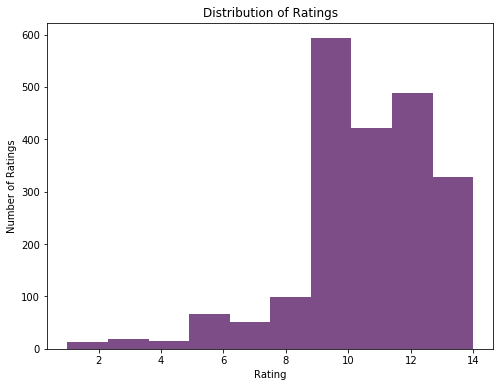

In [179]:
df['rating_numerator'].plot(kind = 'hist', bins = 10, figsize=(8,6), cmap='viridis', alpha = 0.7)

plt.ylabel('Number of Ratings')
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show();

2. Retweet and Favourite

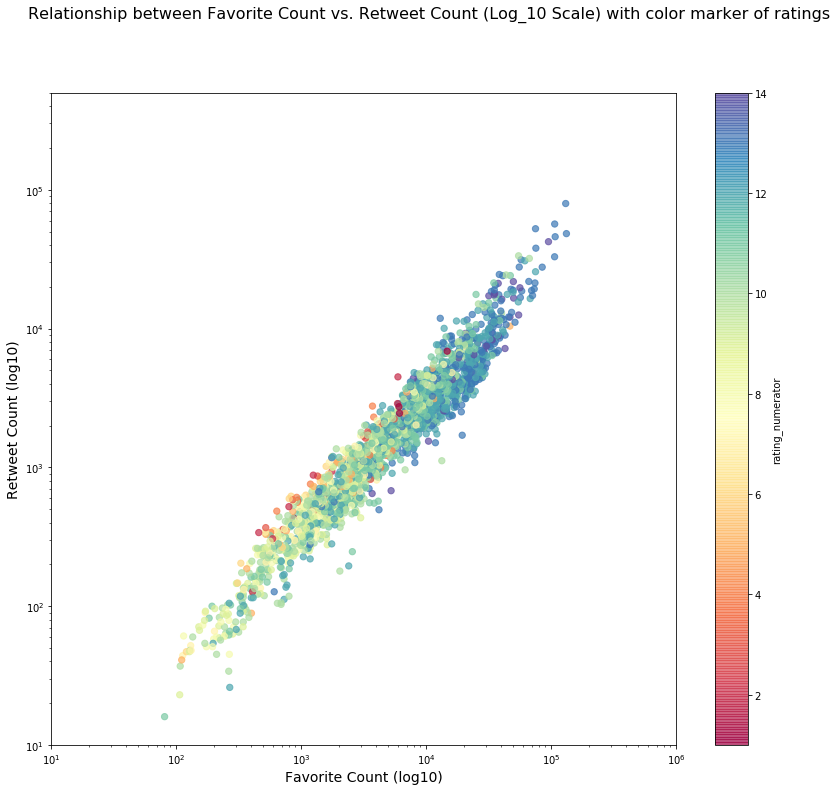

In [187]:
import matplotlib.cm as cm

cmap = cm.get_cmap('Spectral')
plt.figure(figsize = (14, 12))

colors = df['rating_numerator']
markers = 40

plt.xscale('log')
plt.yscale('log')
plt.xlim([10, 1000000])
plt.ylim([10, 500000])

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colors, s = markers, cmap = cmap, alpha = 0.7)

# color bar 
color_bar = plt.colorbar()
color_bar.set_label('rating_numerator')


plt.suptitle('Relationship between Favorite Count vs. Retweet Count (Log_10 Scale) with color marker of ratings', fontsize = 16)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

plt.show();
